In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
taxatable = pd.read_csv("../data/single_strains/taxatable_ecolideep.txt", sep="\t", index_col=0)
strain_taxatable = pd.read_csv("../results/single_strains/taxatable_ecolideep.strain.txt", sep="\t", index_col=0)
species_taxatable = pd.read_csv("../results/single_strains/taxatable_ecolideep.species.txt", sep="\t", index_col=0)
genus_taxatable = pd.read_csv("../results/single_strains/taxatable_ecolideep.genus.txt", sep="\t", index_col=0)

/export/scratch/miniconda3/envs/analysis_SHOGUN/lib/python3.5/site-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/grad00/hillm096/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
taxatable.head()

,ecoli
#OTU ID,
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli;t__Escherichia_coli_str._K-12_substr._MG1655,378213
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,283669
NaN,965
k__Bacteria,3451
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales,4564


In [3]:
# Filter out the NaNs
taxatable = taxatable[[type(_) == str for _ in taxatable.index]]
print(taxatable.head())

# Filter to Only Species
taxatable['level'] = [_.count(';') for _ in taxatable.index]
taxatable = taxatable[taxatable['level'] >= 6]
strain_stats = taxatable[taxatable['level'] >= 7]
print(strain_stats.shape)
print(strain_stats)
print(strain_stats.head())
taxatable = taxatable.drop('level', axis=1)


# Summarize at Species
taxatable['summary'] = [';'.join(_.split(';')[:7]) for _ in taxatable.index]
species_non_taxatable = taxatable.groupby('summary').sum()

print(species_non_taxatable.head())

                                                     ecoli
#OTU ID                                                   
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  378213
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  283669
k__Bacteria                                           3451
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...    4564
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...    1846
(19, 2)
                                                     ecoli  level
#OTU ID                                                          
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...  378213      7
k__Bacteria;p__Proteobacteria;c__Alphaproteobac...       5      7
k__Bacteria;p__Proteobacteria;c__Epsilonproteob...       2      7
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...     467      7
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...       4      7
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...       1      7
k__Bacteria;p__Proteobacteria;c__Gammaproteobac... 

In [4]:
strain_stats

,ecoli,level
#OTU ID,,
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli;t__Escherichia_coli_str._K-12_substr._MG1655,378213,7
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Agrobacterium;s__Agrobacterium_fabrum;t__Agrobacterium_fabrum_str._C58,5,7
k__Bacteria;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Helicobacteraceae;g__Helicobacter;s__Helicobacter_mustelae;t__Helicobacter_mustelae_12198,2,7
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea;t__Lamprocystis_purpurea_DSM_4197,467,7
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cronobacter;s__Cronobacter_sakazakii;t__,4,7
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii;t__Citrobacter_freundii_CFNIH1,1,7
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus;t__,2,7
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_cloacae;t__Enterobacter_cloacae_subsp._cloacae_ATCC_13047,1,7
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli;t__Escherichia_coli_O83:H1_str._NRG_857C,2118,7


In [5]:
species_non_taxatable

,ecoli
summary,
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Agrobacterium;s__Agrobacterium_fabrum,5
k__Bacteria;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Helicobacteraceae;g__Helicobacter;s__Helicobacter_mustelae,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea,469
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii,1
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cronobacter;s__Cronobacter_sakazakii,4
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_cloacae,1
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,608920
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kluyvera;s__Kluyvera_intermedia,1


In [6]:
taxatable

,ecoli,summary
#OTU ID,,
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli;t__Escherichia_coli_str._K-12_substr._MG1655,378213,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Agrobacterium;s__Agrobacterium_fabrum;t__Agrobacterium_fabrum_str._C58,5,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
k__Bacteria;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Helicobacteraceae;g__Helicobacter;s__Helicobacter_mustelae;t__Helicobacter_mustelae_12198,2,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea;t__Lamprocystis_purpurea_DSM_4197,467,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea,2,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,224906,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cronobacter;s__Cronobacter_sakazakii;t__,4,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii;t__Citrobacter_freundii_CFNIH1,1,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus;t__,2,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...


In [7]:
strain_taxatable.head()

,ecoli
#OTU ID,
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Agrobacterium;s__Agrobacterium_fabrum;t__Agrobacterium_fabrum_str._C58,5
k__Bacteria;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Helicobacteraceae;g__Helicobacter;s__Helicobacter_mustelae;t__Helicobacter_mustelae_12198,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea;t__Lamprocystis_purpurea_DSM_4197,469
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus;t__,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii;t__Citrobacter_freundii_CFNIH1,1


In [8]:
species_taxatable.head()

,ecoli
#OTU ID,
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Agrobacterium;s__Agrobacterium_fabrum,5
k__Bacteria;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Helicobacteraceae;g__Helicobacter;s__Helicobacter_mustelae,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea,469
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii,1


In [9]:
print(species_taxatable.sum())
print(species_non_taxatable.sum())

ecoli    903333
dtype: int64
ecoli    609686
dtype: int64


In [10]:
tp_ = species_taxatable.loc['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli']
hit_percentage = tp_/species_taxatable.sum()
print(tp_)
print(hit_percentage)

ecoli    901987
Name: k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli, dtype: int64
ecoli    0.99851
dtype: float64


In [11]:
tp_non = species_non_taxatable.loc['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli']
hit_non_percentage = tp_non/species_non_taxatable.sum()
print(tp_non)
print(hit_non_percentage)

ecoli    608920
Name: k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli, dtype: int64
ecoli    0.998744
dtype: float64


In [12]:
species_taxatable.loc[species_non_taxatable.index] - species_non_taxatable

,ecoli
summary,
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Agrobacterium;s__Agrobacterium_fabrum,0
k__Bacteria;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Helicobacteraceae;g__Helicobacter;s__Helicobacter_mustelae,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Chromatiaceae;g__Lamprocystis;s__Lamprocystis_purpurea,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cronobacter;s__Cronobacter_sakazakii,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_cloacae,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,293067
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kluyvera;s__Kluyvera_intermedia,0


In [13]:
taxatable = pd.read_csv("../data/single_strains/taxatable_kpneumodeep.txt", sep="\t", index_col=0)
strain_taxatable = pd.read_csv("../results/single_strains/taxatable_kpneumodeep.strain.txt", sep="\t", index_col=0)
species_taxatable = pd.read_csv("../results/single_strains/taxatable_kpneumodeep.species.txt", sep="\t", index_col=0)
genus_taxatable = pd.read_csv("../results/single_strains/taxatable_kpneumodeep.genus.txt", sep="\t", index_col=0)

In [14]:
species_taxatable

,kneumoR1,kneumoR2
#OTU ID,,
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Leucobacter;s__Leucobacter_sp._UCD-THU,22,18
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Microbacterium;s__Microbacterium_sp._C448,141,92
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Rothia;s__Rothia_dentocariosa,1,1
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Cutibacterium;s__Cutibacterium_acnes,1,1
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_aureus,1056,729
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,6,4
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_haemolyticus,1,2
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_lugdunensis,0,1
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_xylosus,1,0


In [15]:
tp_ = species_taxatable.loc['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae']
hit_percentage = tp_/species_taxatable.sum()
print(tp_)
print(hit_percentage)

kneumoR1    291098
kneumoR2    259470
Name: k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae, dtype: int64
kneumoR1    0.804674
kneumoR2    0.798831
dtype: float64


In [16]:
# Filter out the NaNs
taxatable = taxatable[[type(_) == str for _ in taxatable.index]]

# Filter to Only Species
taxatable['level'] = [_.count(';') for _ in taxatable.index]
taxatable = taxatable[taxatable['level'] >= 6]
strain_stats = taxatable[taxatable['level'] >= 7]
taxatable = taxatable.drop('level', axis=1)


# Summarize at Species
taxatable['summary'] = [';'.join(_.split(';')[:7]) for _ in taxatable.index]
species_non_taxatable = taxatable.groupby('summary').sum()

tp_non = species_non_taxatable.loc['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae']
hit_non_percentage = tp_non/species_non_taxatable.sum()
print(tp_non)
print(hit_non_percentage)

kneumoR1    243238
kneumoR2    215647
Name: k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae, dtype: int64
kneumoR1    0.816134
kneumoR2    0.811389
dtype: float64


In [17]:
species_taxatable.loc[species_non_taxatable.index] - species_non_taxatable

,kneumoR1,kneumoR2
summary,,
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Leucobacter;s__Leucobacter_sp._UCD-THU,0,0
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Microbacterium;s__Microbacterium_sp._C448,1,1
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Rothia;s__Rothia_dentocariosa,0,0
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Cutibacterium;s__Cutibacterium_acnes,0,0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_aureus,103,79
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,0,0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_haemolyticus,0,0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_lugdunensis,0,0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_xylosus,0,0


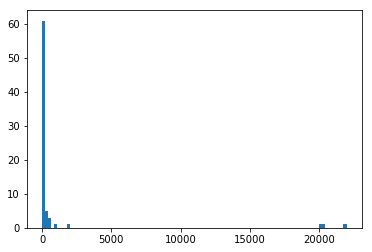

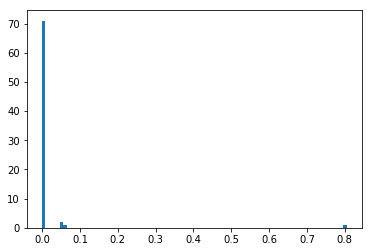

In [18]:
plt.hist(species_taxatable.iloc[species_taxatable.index != 'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae', 0], bins=100)
plt.show()
plt.hist(species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]), bins=100)
plt.show()

In [26]:
species_taxatable[species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]) >= .0001]

,kneumoR1,kneumoR2
#OTU ID,,
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Microbacterium;s__Microbacterium_sp._C448,141,92
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_aureus,1056,729
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae;g__Aeromonas;s__Aeromonas_simiae,155,135
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cedecea;s__Cedecea_neteri,547,530
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus,268,223
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii,650,694
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cronobacter;s__Cronobacter_sakazakii,81,66
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_cloacae,339,339
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_lignolyticus,192,173


In [27]:
species_taxatable[species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]) <= .01].m(

kneumoR1    286
kneumoR2    291
dtype: int64

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae
Counter({'NC_016845.1 Klebsiella pneumoniae subsp. pneumoniae HS11286 chromosome, complete genome': 45256})


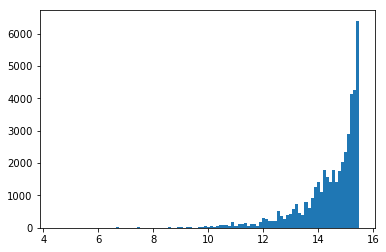

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_sp._PSNIH2
Counter({'NZ_CP009866.1 Pantoea sp. PSNIH2, complete genome': 4})


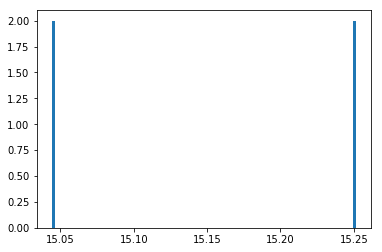

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_oxytoca
Counter({'NZ_CP011636.1 Klebsiella oxytoca strain CAV1374, complete genome': 298})


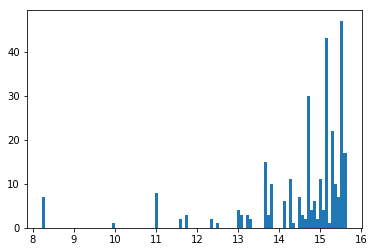

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__[Enterobacter]_aerogenes
Counter({'NC_015663.1 Enterobacter aerogenes KCTC 2190 chromosome, complete genome': 4023})


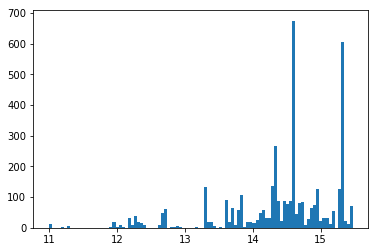

In [67]:
embalmer_out = "../data/single_strain/kpneumoniae_analysis/kpneumoniae_b6_files/combined_sub0.1.fna.b6"

indx = species_taxatable[species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]) >= .05]

import csv
from collections import defaultdict, Counter
dd = defaultdict(list)
dd2 = defaultdict(Counter)
with open(embalmer_out) as inf:
    csv_inf = csv.reader(inf, delimiter="\t")
    for row in csv_inf:
        taxa = row[-1]
        taxa = ";".join(taxa.split(';')[:7])
        if taxa in indx.index and 'plasmid' not in row[1]:
            dd[taxa].append(int(row[8]))
            dd2[taxa].update([row[1]])
            
for key, value in dd.items():
    print(key)
    print(dd2[key])
    plt.hist(np.log(value), bins=100)
    plt.show()

NZ_CP011626.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-6538, complete sequence
Counter({'NZ_CP011626.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-6538, complete sequence': 1})


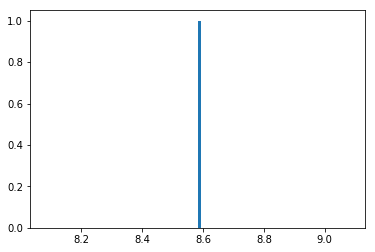

NZ_CP011631.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-54, complete sequence
Counter({'NZ_CP011631.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-54, complete sequence': 719})


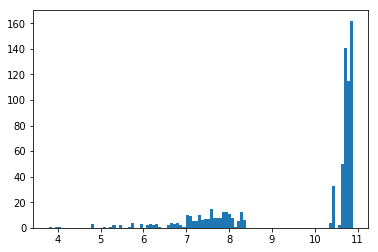

NZ_CP011634.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-228, complete sequence
Counter({'NZ_CP011634.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-228, complete sequence': 30})


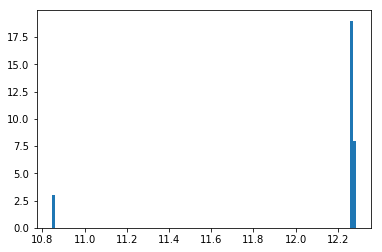

NZ_CP011633.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-150, complete sequence
Counter({'NZ_CP011633.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-150, complete sequence': 1745})


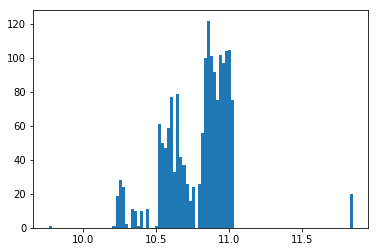

NC_016846.1 Klebsiella pneumoniae subsp. pneumoniae HS11286 plasmid pKPHS2, complete sequence
Counter({'NC_016846.1 Klebsiella pneumoniae subsp. pneumoniae HS11286 plasmid pKPHS2, complete sequence': 702})


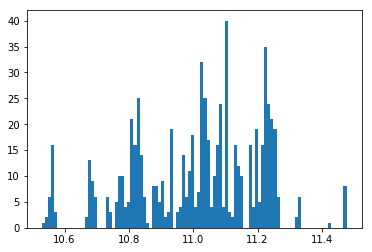

NZ_CP009867.1 Pantoea sp. PSNIH2 plasmid pKPC-56a, complete sequence
Counter({'NZ_CP009867.1 Pantoea sp. PSNIH2 plasmid pKPC-56a, complete sequence': 2454})


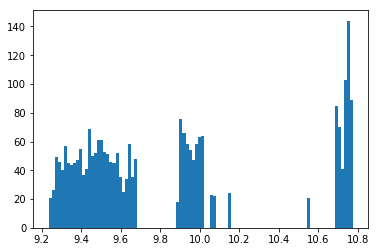

NZ_CP011630.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-49, complete sequence
Counter({'NZ_CP011630.1 Klebsiella oxytoca strain CAV1374 plasmid pCAV1374-49, complete sequence': 9})


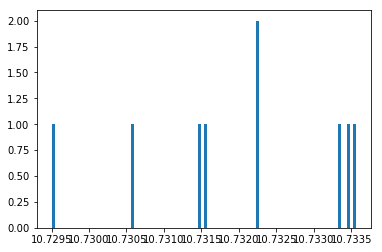

NC_016839.1 Klebsiella pneumoniae subsp. pneumoniae HS11286 plasmid pKPHS3, complete sequence
Counter({'NC_016839.1 Klebsiella pneumoniae subsp. pneumoniae HS11286 plasmid pKPHS3, complete sequence': 15})


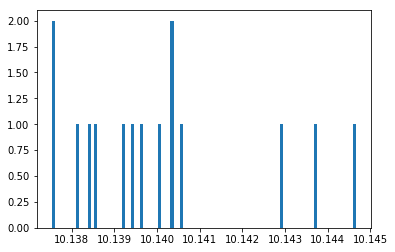

In [69]:
embalmer_out = "../data/single_strain/kpneumoniae_analysis/kpneumoniae_b6_files/combined_sub0.1.fna.b6"

indx = species_taxatable[species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]) >= .05]

import csv
from collections import defaultdict, Counter
dd = defaultdict(list)
dd2 = defaultdict(Counter)
with open(embalmer_out) as inf:
    csv_inf = csv.reader(inf, delimiter="\t")
    for row in csv_inf:
        taxa = row[-1]
        taxa = ";".join(taxa.split(';')[:7])
        if taxa in indx.index and 'plasmid' in row[1]:
            dd[row[1]].append(int(row[8]))
            dd2[row[1]].update([row[1]])
            
for key, value in dd.items():
    print(key)
    print(dd2[key])
    plt.hist(np.log(value), bins=100)

    plt.show()

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kluyvera;s__Kluyvera_intermedia
Counter({'NZ_CP011602.1 Kluyvera intermedia strain CAV1151, complete genome': 22})


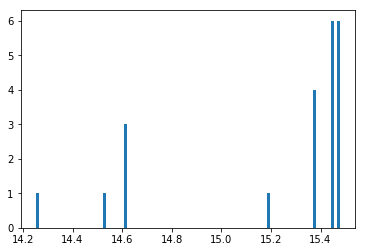

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Hafniaceae;g__Edwardsiella;s__Edwardsiella_ictaluri
Counter({'NC_012779.2 Edwardsiella ictaluri 93-146, complete genome': 44})


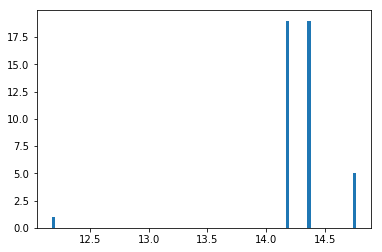

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Serratia;s__Serratia_rubidaea
Counter({'NZ_CP014474.1 Serratia rubidaea strain 1122, complete genome': 4})


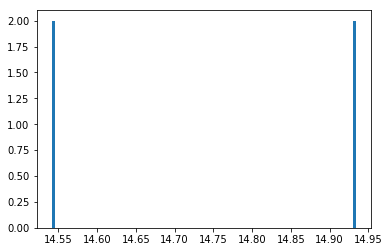

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Franconibacter;s__Franconibacter_pulveris
Counter({'NZ_KK211224.1 Franconibacter pulveris DSM 19144 Q370DRAFT_scaffold00004.4, whole genome shotgun sequence': 3, 'NZ_JHYZ01000028.1 Franconibacter pulveris DSM 19144 Q370DRAFT_scaffold00022.22_C, whole genome shotgun sequence': 1, 'NZ_JHYZ01000029.1 Franconibacter pulveris DSM 19144 Q370DRAFT_scaffold00023.23_C, whole genome shotgun sequence': 1})


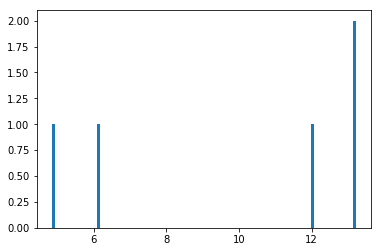

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_freundii
Counter({'NZ_CP007557.1 Citrobacter freundii CFNIH1, complete genome': 20})


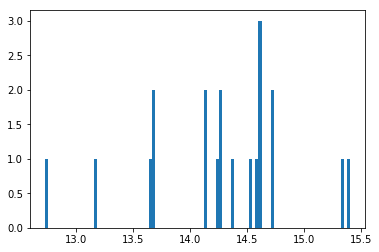

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Erwinia;s__Erwinia_tracheiphila
Counter({'NZ_KE136308.1 Erwinia tracheiphila PSU-1 scaffold00001, whole genome shotgun sequence': 13})


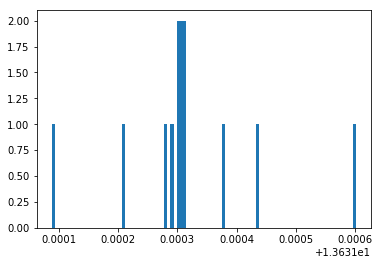

k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_aureus
Counter({'NC_007795.1 Staphylococcus aureus subsp. aureus NCTC 8325 chromosome, complete genome': 132, 'NZ_CP009828.1 Staphylococcus aureus strain MS4, complete genome': 29})


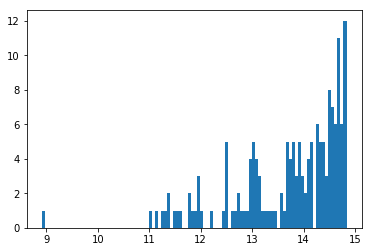

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Erwinia;s__Erwinia_billingiae
Counter({'NC_014306.1 Erwinia billingiae strain Eb661 complete chromosome': 13})


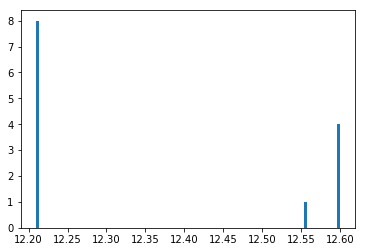

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli
Counter({'NC_018658.1 Escherichia coli O104:H4 str. 2011C-3493 chromosome, complete genome': 116, 'NC_002695.1 Escherichia coli O157:H7 str. Sakai, complete genome': 13, 'NC_017634.1 Escherichia coli O83:H1 str. NRG 857C chromosome, complete genome': 7, 'NC_011751.1 Escherichia coli UMN026, complete genome': 6, 'NC_011750.1 Escherichia coli IAI39 chromosome, complete genome': 1})


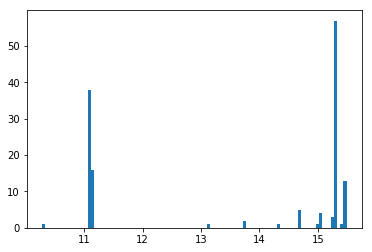

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kosakonia;s__Kosakonia_sacchari
Counter({'NZ_CP007215.2 Enterobacter sacchari SP1, complete genome': 73})


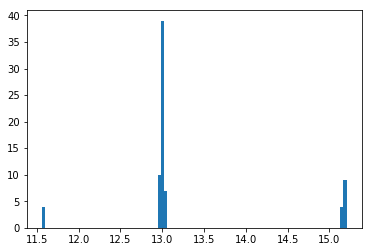

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__Halomonadaceae;g__Zymobacter;s__Zymobacter_palmae
Counter({'NZ_KK211051.1 Zymobacter palmae DSM 10491 genomic scaffold Q387DRAFT_scaffold00004.4, whole genome shotgun sequence': 2})


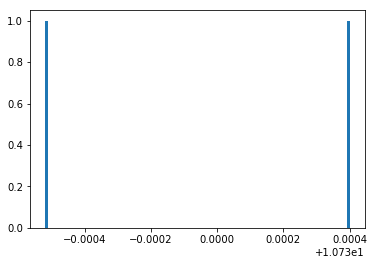

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Chania;s__Chania_multitudinisentens
Counter({'NZ_CP007044.2 Chania multitudinisentens RB-25, complete genome': 5})


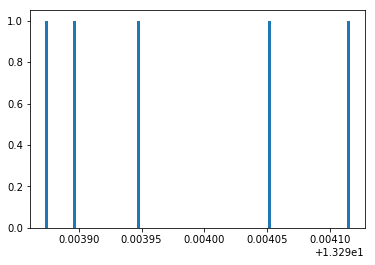

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cedecea;s__Cedecea_neteri
Counter({'NZ_CP009451.1 Cedecea neteri strain SSMD04, complete genome': 102})


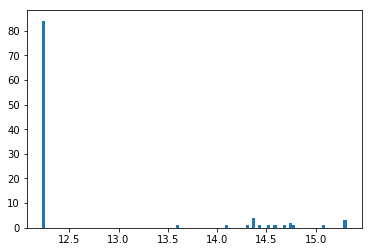

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae;g__Aeromonas;s__Aeromonas_simiae
Counter({'NZ_CDBY01000048.1 Aeromonas simiae genome assembly PRJEB7039, contig A_simiae_F325_contig46, whole genome shotgun sequence': 25})


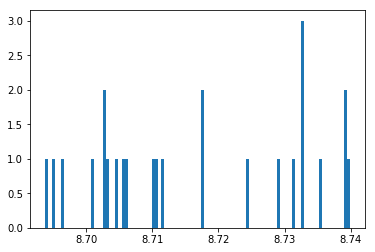

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_agglomerans
Counter({'NZ_CP016889.1 Pantoea agglomerans strain C410P1, complete genome': 31})


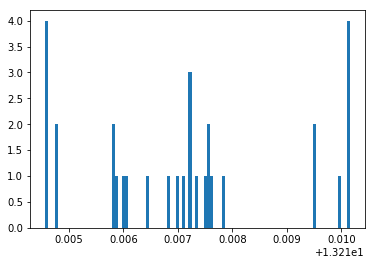

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Shigella;s__Shigella_dysenteriae
Counter({'NC_007606.1 Shigella dysenteriae Sd197 chromosome, complete genome': 1})


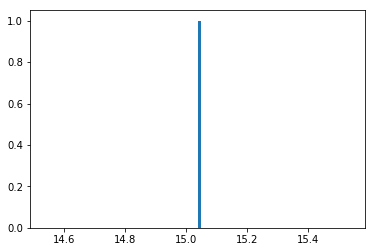

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Mangrovibacter;s__Mangrovibacter_sp._MFB070
Counter({'NZ_JJMI01000045.1 Mangrovibacter sp. MFB070 Contig-045, whole genome shotgun sequence': 26, 'NZ_JJMI01000035.1 Mangrovibacter sp. MFB070 Contig-035, whole genome shotgun sequence': 2})


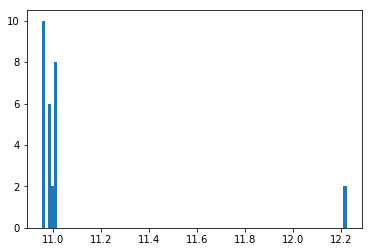

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Yersinia;s__Yersinia_enterocolitica
Counter({'NC_008800.1 Yersinia enterocolitica subsp. enterocolitica 8081 chromosome, complete genome': 3})


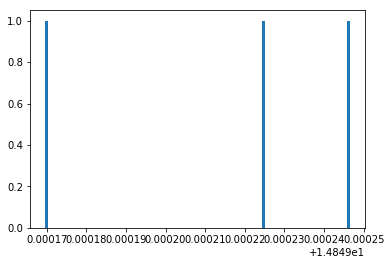

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter_amalonaticus
Counter({'NZ_CP014070.1 Citrobacter amalonaticus strain FDAARGOS_165, complete genome': 43})


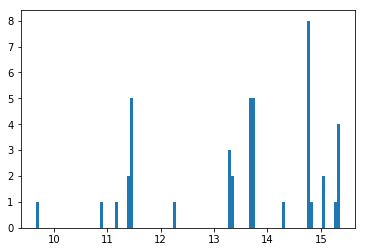

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_sp._638
Counter({'NC_009436.1 Enterobacter sp. 638, complete genome': 9})


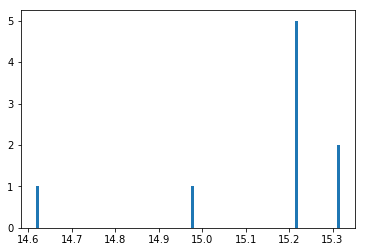

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_cloacae
Counter({'NC_014121.1 Enterobacter cloacae subsp. cloacae ATCC 13047 chromosome, complete genome': 45})


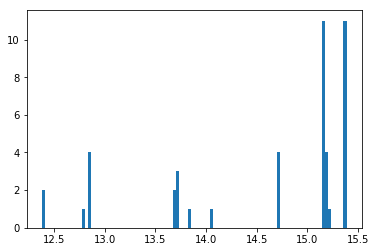

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Erwinia;s__Erwinia_iniecta
Counter({'NZ_JRXE01000041.1 Erwinia iniecta strain B120 contig000041, whole genome shotgun sequence': 4})


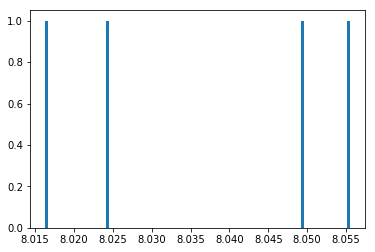

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Salmonella;s__Salmonella_enterica
Counter({'NC_003197.2 Salmonella enterica subsp. enterica serovar Typhimurium str. LT2, complete genome': 12, 'NC_003198.1 Salmonella enterica subsp. enterica serovar Typhi str. CT18, complete genome': 4})


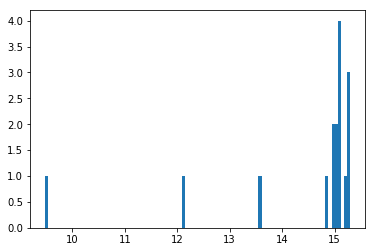

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Shimwellia;s__Shimwellia_blattae
Counter({'NC_017910.1 Shimwellia blattae DSM 4481 = NBRC 105725, complete genome': 10})


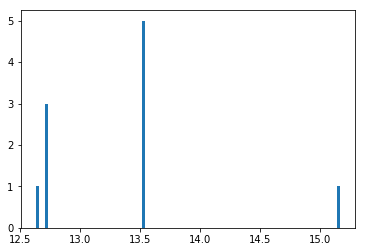

k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Leucobacter;s__Leucobacter_sp._UCD-THU
Counter({'NZ_APJM01000030.1 Leucobacter sp. UCD-THU contig_30, whole genome shotgun sequence': 8})


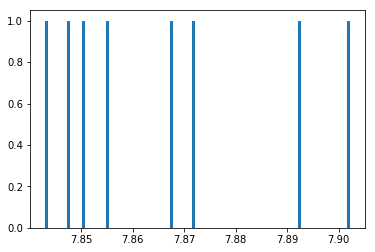

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Siccibacter;s__Siccibacter_turicensis
Counter({'NZ_AWFZ01000001.1 Siccibacter turicensis LMG 23730 contig002, whole genome shotgun sequence': 6, 'NZ_AWFZ01000012.1 Siccibacter turicensis LMG 23730 contig016, whole genome shotgun sequence': 4, 'NZ_AWFZ01000028.1 Siccibacter turicensis LMG 23730 contig042, whole genome shotgun sequence': 2, 'NZ_AWFZ01000002.1 Siccibacter turicensis LMG 23730 contig003, whole genome shotgun sequence': 1})


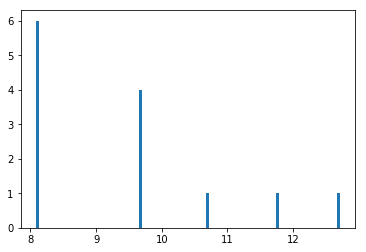

k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Rothia;s__Rothia_dentocariosa
Counter({'NC_014643.1 Rothia dentocariosa ATCC 17931, complete genome': 1})


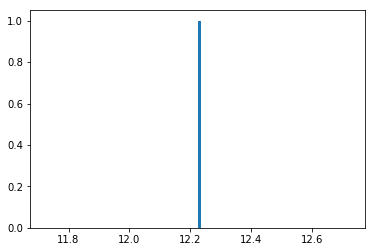

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Pluralibacter;s__Pluralibacter_gergoviae
Counter({'NZ_CP009450.1 Pluralibacter gergoviae strain FB2, complete genome': 12})


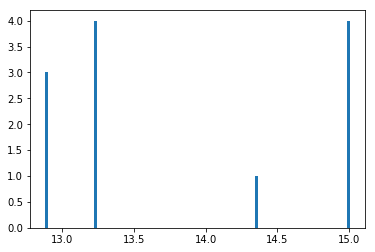

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Erwinia;s__Erwinia_amylovora
Counter({'NC_013961.1 Erwinia amylovora CFBP1430 complete genome': 5})


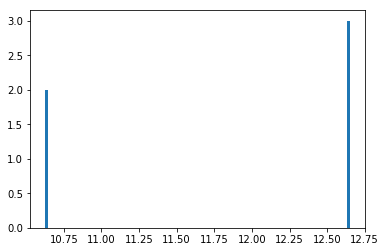

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Pectobacteriaceae;g__Sodalis;s__Sodalis_praecaptivus
Counter({'NZ_CP006569.1 Sodalis praecaptivus strain HS1, complete genome': 8})


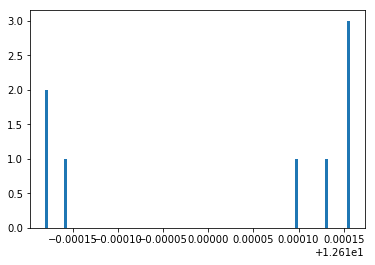

k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Microbacteriaceae;g__Microbacterium;s__Microbacterium_sp._C448
Counter({'NZ_HG779703.1 Microbacterium sp. C448 genomic scaffold, scaff123, whole genome shotgun sequence': 22})


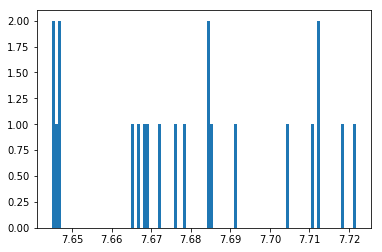

k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Bradyrhizobiaceae;g__Rhodopseudomonas;s__Rhodopseudomonas_palustris
Counter({'NZ_KI632515.1 Rhodopseudomonas palustris JSC-3b genomic scaffold Scaffold5, whole genome shotgun sequence': 1})


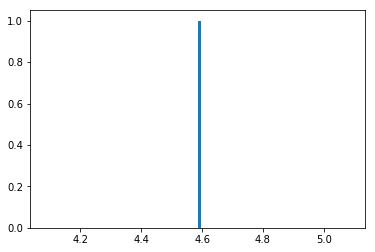

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter;s__Enterobacter_lignolyticus
Counter({'NC_014618.1 Enterobacter lignolyticus SCF1, complete genome': 30})


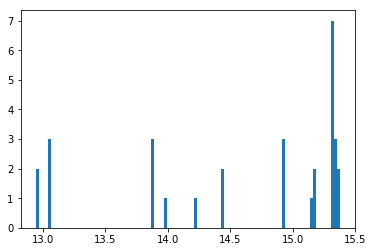

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Erwinia;s__Erwinia_toletana
Counter({'NZ_KB372804.1 Erwinia toletana DAPP-PG 735 scf_2378_174.1, whole genome shotgun sequence': 1})


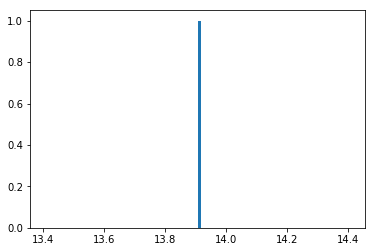

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_rwandensis
Counter({'NZ_CP009454.1 Pantoea rwandensis strain ND04, complete genome': 1})


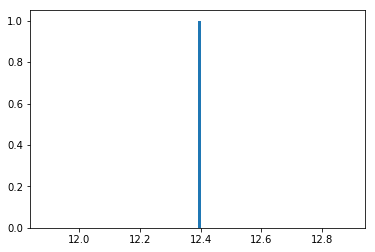

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Serratia;s__Serratia_odorifera
Counter({'NZ_GG753567.1 Serratia odorifera DSM 4582 SCAFFOLD1, whole genome shotgun sequence': 5, 'NZ_GG753568.1 Serratia odorifera DSM 4582 SCAFFOLD2, whole genome shotgun sequence': 1})


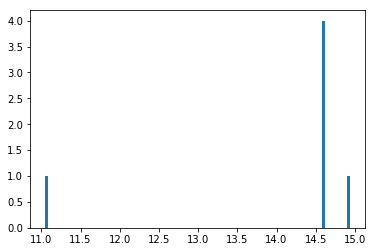

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Hafniaceae;g__Obesumbacterium;s__Obesumbacterium_proteus
Counter({'NZ_CP014608.1 Obesumbacterium proteus strain DSM 2777, complete genome': 1})


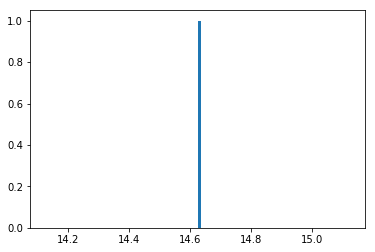

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__;s__Plautia_stali_symbiont
Counter({'NC_022546.1 Plautia stali symbiont DNA, complete genome': 4})


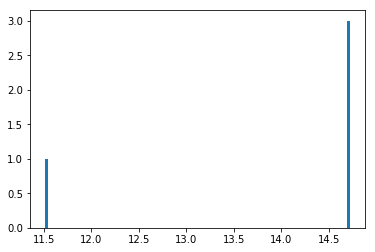

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Trabulsiella;s__Trabulsiella_odontotermitis
Counter({'NZ_LIFV01000019.1 Trabulsiella odontotermitis strain TbO2.3 contig19, whole genome shotgun sequence': 4, 'NZ_LIFV01000003.1 Trabulsiella odontotermitis strain TbO2.3 contig3, whole genome shotgun sequence': 3, 'NZ_LIFV01000014.1 Trabulsiella odontotermitis strain TbO2.3 contig14, whole genome shotgun sequence': 2, 'NZ_LIFV01000001.1 Trabulsiella odontotermitis strain TbO2.3 contig1, whole genome shotgun sequence': 2})


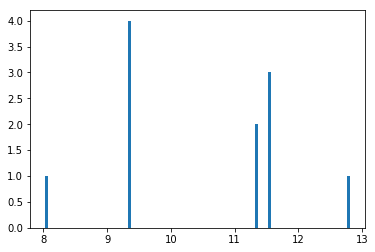

k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis
Counter({'NC_004461.1 Staphylococcus epidermidis ATCC 12228 chromosome, complete genome': 1})


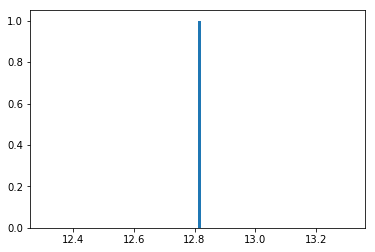

k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_haemolyticus
Counter({'NC_007168.1 Staphylococcus haemolyticus JCSC1435 DNA, complete genome': 1})


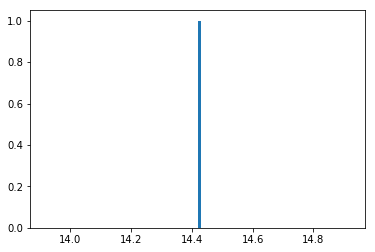

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Rahnella;s__Rahnella_aquatilis
Counter({'NC_017047.1 Rahnella aquatilis HX2, complete genome': 66})


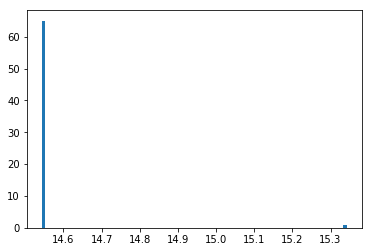

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Cronobacter;s__Cronobacter_sakazakii
Counter({'NZ_CP011047.1 Cronobacter sakazakii strain ATCC 29544, complete genome': 13})


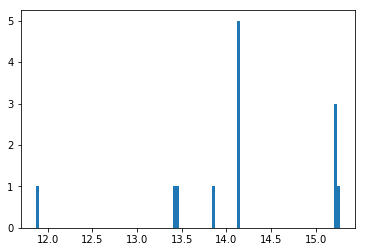

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Eubacteriaceae;g__Eubacterium;s__Eubacterium_ramulus
Counter({'NZ_KI271141.1 Eubacterium ramulus ATCC 29099 genomic scaffold Scaffold419, whole genome shotgun sequence': 1})


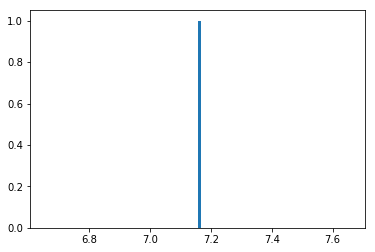

In [70]:
# Non-Plasmid Hits
embalmer_out = "../data/single_strain/kpneumoniae_analysis/kpneumoniae_b6_files/combined_sub0.1.fna.b6"

indx = species_taxatable[species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]) <= .05]

import csv
from collections import defaultdict, Counter
dd = defaultdict(list)
dd2 = defaultdict(Counter)
with open(embalmer_out) as inf:
    csv_inf = csv.reader(inf, delimiter="\t")
    for row in csv_inf:
        taxa = row[-1]
        taxa = ";".join(taxa.split(';')[:7])
        if taxa in indx.index and 'plasmid' not in row[1]:
            dd[taxa].append(int(row[8]))
            dd2[taxa].update([row[1]])
            
for key, value in dd.items():
    print(key)
    print(dd2[key])
    plt.hist(np.log(value), bins=100)
    plt.show()

NZ_CP007558.1 Citrobacter freundii CFNIH1 plasmid pKEC-a3c, complete sequence
Counter({'NZ_CP007558.1 Citrobacter freundii CFNIH1 plasmid pKEC-a3c, complete sequence': 66})


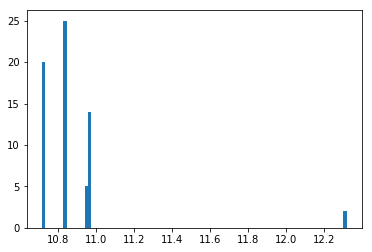

NC_014107.1 Enterobacter cloacae subsp. cloacae ATCC 13047 plasmid pECL_A, complete sequence
Counter({'NC_014107.1 Enterobacter cloacae subsp. cloacae ATCC 13047 plasmid pECL_A, complete sequence': 23})


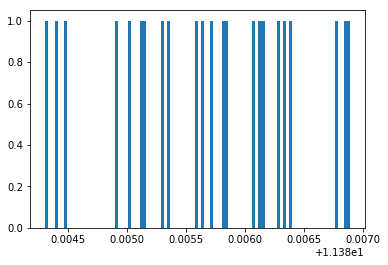

NZ_CP011600.1 Kluyvera intermedia strain CAV1151 plasmid pCAV1151-215, complete sequence
Counter({'NZ_CP011600.1 Kluyvera intermedia strain CAV1151 plasmid pCAV1151-215, complete sequence': 1})


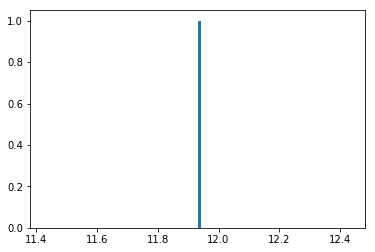

NZ_CP010351.1 Acinetobacter johnsonii XBB1 plasmid pXBB1-9, complete sequence
Counter({'NZ_CP010351.1 Acinetobacter johnsonii XBB1 plasmid pXBB1-9, complete sequence': 110})


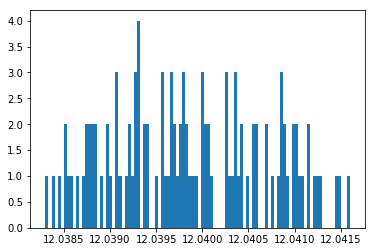

NC_014304.1 Erwinia billingiae strain Eb661 complete plasmid pEB102
Counter({'NC_014304.1 Erwinia billingiae strain Eb661 complete plasmid pEB102': 1})


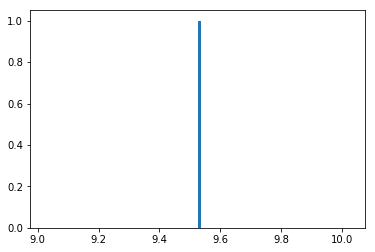

NZ_CP009867.1 Pantoea sp. PSNIH2 plasmid pKPC-56a, complete sequence
Counter({'NZ_CP009867.1 Pantoea sp. PSNIH2 plasmid pKPC-56a, complete sequence': 2})


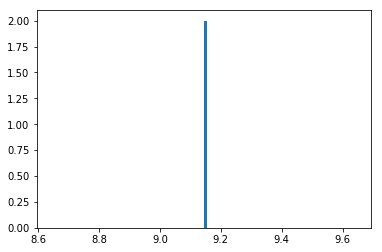

In [71]:
# Plasmid Hits
embalmer_out = "../data/single_strain/kpneumoniae_analysis/kpneumoniae_b6_files/combined_sub0.1.fna.b6"

indx = species_taxatable[species_taxatable.iloc[:, 0]/np.sum(species_taxatable.iloc[:, 0]) <= .05]

import csv
from collections import defaultdict, Counter
dd = defaultdict(list)
dd2 = defaultdict(Counter)
with open(embalmer_out) as inf:
    csv_inf = csv.reader(inf, delimiter="\t")
    for row in csv_inf:
        taxa = row[-1]
        taxa = ";".join(taxa.split(';')[:7])
        if taxa in indx.index and 'plasmid' in row[1]:
            dd[row[1]].append(int(row[8]))
            dd2[row[1]].update([row[1]])
            
for key, value in dd.items():
    print(key)
    print(dd2[key])
    plt.hist(np.log(value), bins=100)
    plt.show()